In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib.colors import LinearSegmentedColormap

import linecache
import scipy.stats as st
import os
    
SMALL_SIZE = 10
MEDIUM_SIZE = 11
BIGGER_SIZE = 13
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

############################### OPTIONAL
iso_UVIT = pd.read_csv('C:/Users/Zert W/Desktop/PhD/Project2_Membership/Isochrones/UVIT_output389482416286.dat.txt',skiprows=(0,1,2,3,4,5,6,7,8,9,10) ,engine='python',comment='#',delimiter= '\s+', header=0)
iso_Gaia = pd.read_csv('C:/Users/Zert W/Desktop/PhD/Project2_Membership/Isochrones/Gaia_output759739042100.dat.txt',skiprows=(0,1,2,3,4,5,6,7,8,9,10) ,engine='python',comment='#',delimiter= '\s+', header=0)
iso_all = iso_UVIT

iso_all['Gmag']=iso_Gaia.Gmag.values
iso_all['G_BPmag']=iso_Gaia.G_BPmag.values
iso_all['G_RPmag']=iso_Gaia.G_RPmag.values

def iso_creating_2(AGE, MET):
    iso = iso_all[(iso_all.logAge == AGE) & (iso_all.MH == MET)  & (iso_all.label < 3.5 )]
    print (AGE, MET)
    temp = 10**iso["logTe"]
    lum   = iso["logL"]
    print (len(iso))
    return temp, lum 

###############################
def get_number_from_string(line): 
    # Read a float number from a sentence string
    for t in line.split():
        try:
            l = float(t)
        except ValueError:
            pass
    return l

def _initializing_sf_T(mode, sf_min, sf_max):
    # Initialising the scaling factor grid and temperature grid for different modes
    if mode=='test_Kr_Koe': # Testing of working of Kurucz (already fitted)+Koster(to be fitted) model binary.
        ScaleList = np.geomspace(sf_min, sf_max, num=3)
        TempBList = ['10000','22000','30000']
    if mode=='rough_Kr_Koe': # rough fitting of Kurucz (already fitted)+Koster(to be fitted) model binary. 
        ScaleList = np.geomspace(sf_min, sf_max, num=20)
        TempBList = ['05000','06000','07000','08000','09000','10000','11000','12000','13000','14000','15000','16000','17000','18000','19000','20000','21000','22000','23000','24000','25000','26000','27000','28000','29000','30000','35000','40000','50000','60000','70000','80000']
    if mode=='finer_Kr_Koe': # finer fitting of Kurucz (already fitted)+Koster(to be fitted) model binary.
        ScaleList = np.geomspace(sf_min, sf_max, num=100)
        TempBList = ['05000','05250','05500','05750','06000','06250','06500','06750','07000','07250','07500','07750','08000','08250','08500','08750','09000','09250','09500','09750','10000','10250','10500','10750','11000','11250','11500','11750','12000','12250','12500','12750','13000','13250','13500','13750','14000','14250','14500','14750','15000','15250','15500','15750','16000','16250','16500','16750','17000','17250','17500','17750','18000','18250','18500','18750','19000','19250','19500','19750','20000','21000','22000','23000','24000','25000','26000','27000','28000','29000','30000','32000','34000','35000','36000','38000','40000','45000','50000','60000','70000','80000']
    if mode=='rough_Kr_Kr': # rough fitting of Kurucz (already fitted)+Kurucz(to be fitted) model binary.
        ScaleList = np.geomspace(sf_min, sf_max, num=20)
        TempBList = ['5000','6000','7000','8000','9000','10000','11000','12000','13000','14000','15000','16000','17000','18000','19000','20000','21000','22000','23000','24000','25000','26000','27000','28000','29000','30000','32000','34000','36000','38000']
    if mode=='finer_Kr_Kr': # finer fitting of Kurucz (already fitted)+Kurucz(to be fitted) model binary.
        ScaleList = np.geomspace(sf_min, sf_max, num=100)
        TempBList = ['5000','5250','5500','5750','6000','6250','6500','6750','7000','7250','7500','7750','8000','8250','8500','8750','9000','9250','9500','9750','10000','10250','10500','10750','11000','11250','11500','11750','12000','12250','12500','12750','13000','14000','15000','16000','17000','18000','19000','20000','21000','22000','23000','24000','25000','26000','27000','28000','29000','30000','31000','32000','33000','34000','35000','36000','37000','38000','39000']
    if mode=='test_Kr_Kr': # Testing of working of Kurucz (already fitted)+Kurucz(to be fitted) model binary.
        ScaleList = np.geomspace(sf_min, sf_max, num=3)
        TempBList = ['5000','5250','5500']
    if mode=='rough_Kr_Tlusty': # rough fitting of Kurucz (already fitted)+Tlusty(to be fitted) model binary.
        ScaleList = np.geomspace(sf_min, sf_max, num=20)
        TempBList = ['15000','17000','19000','21000','23000','25000','27000','29000','30000','32500' ,'35000','37500','40000','42500','45000','47500','50000','52500','55000']
    if mode=='finer_Kr_Tlusty': # finer fitting of Kurucz (already fitted)+Tlusty(to be fitted) model binary.
        ScaleList = np.geomspace(sf_min, sf_max, num=100)
        TempBList = ['15000','16000','17000','18000','19000','20000','21000','22000','23000','24000','25000','26000','27000','28000','29000','30000','32500' ,'35000','37500','40000','42500','45000','47500','50000','52500','55000']
    if mode=='test_Kr_Tlusty': # Testing of working of Kurucz (already fitted)+Tlusty(to be fitted) model binary.
        ScaleList = np.geomspace(sf_min, sf_max, num=3)
        TempBList = ['15000','16000','17000']
    print  ('L_SF,  L_T,  L_T*L_SF = ','',len(ScaleList),len(TempBList) , len(TempBList)*len(ScaleList))
    # Return scale factor list and temperature list
    return ScaleList,TempBList    

def _calculating_chi2(scale_list, temp_B_list, fitting_required, mode):
    # 
    if fitting_required == 1:
        data_chi = pd.DataFrame()
        count=0
        for temp in (temp_B_list):
            for sf in (scale_list):   
        #         print (temp,sf)
                flux_model['Total'] = flux_model['flux_A'] + sf*flux_model[temp]
                flux_model['Obs-Mod']=(flux_model['CorFlux'] - flux_model['Total'])**2
                flux_model['ersqr']= (flux_model['CorErr'])**2
                flux_model['chisqu']= flux_model[ 'Obs-Mod']/flux_model['ersqr']
                Sumchi = flux_model['chisqu'].sum()

                data_chi.loc[count, 'Temp'] = temp
                data_chi.loc[count, 'SF'] = sf
                data_chi.loc[count, 'ChiSqr'] = Sumchi
                
                if (count%1000==0):
                    print count
                count +=1

        # flux_model.head()  
        data_chi=data_chi.sort_values('ChiSqr')
        data_chi = data_chi.reset_index(drop=True)
        if not os.path.exists(DIR_Main +'SED_data/chi_files/'):
            os.makedirs(DIR_Main +'SED_data/chi_files/')
        ChiSqr_File_B = DIR_Main +'SED_data/chi_files/'+STAR_NAME+'_ChiSqur_logg_B' + str(logg_B) + '_' +MH_B+'_'+ mode +'_' +model+'_'+str(cycle)  + '.csv'
        data_chi.to_csv(ChiSqr_File_B, index=False, header=True, sep=',')

    elif fitting_required == 0:
        ChiSqr_File_B = DIR_Main +'SED_data/chi_files/'+STAR_NAME+'_ChiSqur_logg_B' + str(logg_B) + '_' +MH_B+'_'+ mode +'_' +model+'_'+str(cycle)  + '.csv'
        data_chi = pd.read_csv(ChiSqr_File_B, engine='python', dtype={'Temp':'object','SF':'float','ChiSqr':'float'})
    print data_chi.head()
    return data_chi
        
def _minimizing_chi2():  
    global Teff_B,sf_B
    Teff_B = data_chi.Temp[0]#.astype(np.float16)[0]
    sf_B = data_chi.SF[0]
    flux_model['flux_B']=sf_B * flux_model[str(Teff_B)]
    flux_model['Total'] = flux_model['flux_B']+flux_model['flux_A']
    flux_model['Obs-Mod']=(flux_model['CorFlux'] - flux_model['Total'])**2
    flux_model['ersqr']= (flux_model['CorErr'])**2
    flux_model['chisqu']= flux_model[ 'Obs-Mod']/flux_model['ersqr'] 

def _create_plots_1(mode):
    ###################### initialising
    label_A = 'A ' + str(Teff_A) + ' K, logg ' + str(logg_A)# + ' (Kurucz)'
    label_B = 'B ' + str(Teff_B) + ' K, logg ' + str(logg_B)+'\nR='+str(round(data_chi.SF[0]**0.5 * (distance*44353566.0),3)) + ' L='+str(round(_lumi(_radius(data_chi.SF[0]),Teff_B),3))# + ' (Koester)'
    f, axes = plt.subplots(figsize=(12,6),nrows = 3, ncols = 3,squeeze=True,sharex=True, sharey=True)
    map(lambda axes: axes.set_axis_off(), axes.ravel())
    axes[0][0] = f.add_axes([0.1, 0.44, 0.45, 0.50])
    axes[1][0] = f.add_axes([0.1, 0.27, 0.45, 0.17])
    axes[2][0] = f.add_axes([0.1, 0.10, 0.45, 0.17])

    axes[0][1] = f.add_axes([0.63, 0.66, 0.30, 0.28])
    axes[1][1] = f.add_axes([0.63, 0.38, 0.30, 0.28])
    axes[2][1] = f.add_axes([0.63, 0.10, 0.30, 0.28])

    axes[0][2] = f.add_axes([0.93, 0.10, 0.02, 0.84])
    #######################
    axes[0][0].plot(flux_model['wave'], flux_model['flux_A'], color='orange', linestyle='-.',label =label_A, lw=1)
    axes[0][0].plot(flux_model['wave'], flux_model['flux_B'], color='dodgerblue', linestyle=(0, (5, 5)),label =label_B, lw=1)
    axes[0][0].plot(flux_model['wave'], flux_model['Total'], color='green', linestyle='-',label ='Model', lw=1)
    matplotlib.rcParams.update({'errorbar.capsize': 4})
    axes[0][0].errorbar(flux_model['wave'], flux_model['CorFlux'], yerr=flux_model['CorErr'],color='k', label='Obs',fmt='none',lw=2)


    axes[1][0].plot(flux_model['wave'], (flux_model['CorFlux']-flux_model['flux_A'])/flux_model['CorFlux'],label='',marker='',color='red', linestyle='-.',lw=2)
    axes[1][0].plot(flux_model['wave'], (flux_model['CorFlux']-flux_model['flux_A']-flux_model['flux_B'])/flux_model['CorFlux'],label='',marker='',color='green',lw=2, linestyle='-')
    axes[1][0].errorbar(flux_model['wave'], flux_model['CorFlux']-flux_model['CorFlux'], yerr=flux_model['CorErr_frac'],color='k', label='Obs',fmt='none',lw=2)

    axes[2][0].plot(flux_model['wave'], flux_model['chisqu'],label='',marker='o',color='green', linestyle='-',lw=2)
    #############
    x_data = data_chi.Temp.astype(np.int).head(100)
    y_data = _radius(data_chi['SF'].head(100))
    c_data = data_chi['ChiSqr'].head(100)
    axes[0][1].scatter(data_chi.Temp.astype(np.int),_radius(data_chi['SF']), marker='.', c='b', s=1,rasterized = True, zorder=0)#,c=c_data, cmap='hot', s=1, marker='.')
    cs = axes[0][1].scatter(x_data,y_data,c=c_data, cmap='hot',rasterized = True, zorder=2)

    y_data = data_chi['SF'].head(100)
    axes[1][1].scatter(data_chi.Temp.astype(np.int),data_chi['SF'],marker='.', c='b', s=1,rasterized = True,zorder=0)
    axes[1][1].scatter(x_data,y_data,c=c_data, cmap='hot',rasterized = True,zorder=2)

    y_data = data_chi['ChiSqr'].head(100)
    axes[2][1].scatter(x_data,y_data,c=c_data, cmap='hot',rasterized = True,zorder=2)  
    #############
    f.colorbar(cs, cax=axes[0][2])
    cs.set_clim(c_data.min(),c_data.max())
    axes[0][2].set_ylabel('$\chi^2$')
    axes[0][2].yaxis.set_label_position("right")
    #############
    axes[0][1].axvline(int(Teff_B), ls=(0, (5, 10)), lw=2, c='g',zorder=1)
    axes[1][1].axvline(int(Teff_B), ls=(0, (5, 10)), lw=2, c='g',zorder=1)
    axes[2][1].axvline(int(Teff_B), ls=(0, (5, 10)), lw=2, c='g',zorder=1)

    axes[0][1].axhline(_radius(data_chi.SF[0]), ls=(0, (5, 10)), lw=2, c='g',zorder=1)
    axes[1][1].axhline(data_chi.SF[0], ls=(0, (5, 10)), lw=2, c='g',zorder=1)
    axes[2][1].axhline(data_chi.ChiSqr[0], ls=(0, (5, 10)), lw=2, c='g',zorder=1)
    #######################
    axes[0][0].set_title(STAR_NAME+'    ' +mode)
    axes[0][1].set_title('Best 100 fits')
    axes[2][0].set_title('$\chi^2$ = '+str(int(flux_model['chisqu'].sum())),x=0.8,y=0.7)
    axes[0][0].set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ $\AA$$^{-1}$)')
    axes[1][0].set_ylabel('Residual')
    axes[2][0].set_ylabel('$\chi^2_i$')
    axes[2][0].set_xlabel('Wavelength ($\AA$)')
    axes[0][1].set_ylabel('R ($R_{\odot}$)')
    axes[1][1].set_ylabel('SF')
    axes[2][1].set_ylabel('$\chi^2$')
    axes[2][1].set_xlabel('Temp (K)')

    axes[0][0].set_xscale('log')
    axes[0][0].set_yscale('log')
    axes[1][0].set_xscale('log')
    axes[2][0].set_xscale('log')
    axes[0][1].set_yscale('log')
    axes[1][1].set_yscale('log')

    plt.setp(axes[0][0].get_xticklabels(),visible=False)
    plt.setp(axes[1][0].get_xticklabels(),visible=False)
    plt.setp(axes[0][1].get_xticklabels(),visible=False)
    plt.setp(axes[1][1].get_xticklabels(),visible=False)

    axes[0][0].tick_params(which='both', direction='in', width=2)
    axes[1][0].tick_params(which='both', direction='in', width=2)
    axes[2][0].tick_params(which='both', direction='in', width=2)
    axes[0][1].tick_params(which='both', direction='out', length=4)
    axes[1][1].tick_params(which='both', direction='out', length=4)
    axes[2][1].tick_params(which='both', direction='out', length=4)
    
    axes[0][1].grid()
    axes[1][1].grid()
    axes[2][1].grid()
    axes[0][0].grid()
    axes[1][0].grid()
    axes[2][0].grid()
 
    axes[0][0].set_xlim([1000,50000])
    axes[1][0].set_xlim([1000,50000])
    axes[2][0].set_xlim([1000,50000])
    if ((mode=='test_Kr_Koe') or (mode=='finer_Kr_Kr') or (mode=='rough_Kr_Kr')):
        axes[0][1].set_xlim([5000,40000])
        axes[1][1].set_xlim([5000,40000])
        axes[2][1].set_xlim([5000,40000])
    if ((mode=='test_Kr_Koe') or (mode=='finer_Kr_Koe') or (mode=='rough_Kr_Koe')):    
        axes[0][1].set_xlim([5000,82000])
        axes[1][1].set_xlim([5000,82000])
        axes[2][1].set_xlim([5000,82000])

    axes[0][0].set_ylim([1.1e-18,2e-14])
    axes[0][1].set_ylim(_radius(sf_min),_radius(sf_max))
    axes[1][1].set_ylim(sf_min,sf_max)

    #############
    if not os.path.exists(DIR_Main +'SED_data/'+mode):
        os.makedirs(DIR_Main +'SED_data/'+mode)
    axes[0][0].legend(scatterpoints=1, loc='upper right')
    plt.savefig(DIR_Main + 'SED_data/'+mode+'/'+STAR_NAME+'_'+str(Teff_B)+'_logg'+str(logg_B)+'_'+MH_B+'_'+model+'_'+str(cycle)+'.png', format='png', dpi=300)#,bbox_inches='tight')

def _create_plots_2(mode):
    clim_arr=[240,400,105,120,120]
    data_chi_top = _get_top_chi2_fits(DIR_Main,STAR_NAME,logg_B,MH_B,mode,model,100)
    radius_top = _radius(data_chi_top['SF'])
    Temp_top = data_chi_top['Temp']
    lumi_top = _lumi2(radius_top,Temp_top)
    
    ###################### initialising
    label_A = 'A ' + str(Teff_A) + ' K, logg ' + str(logg_A)# + ' (Kurucz)'
    label_B = 'B ' + str(Teff_B) + ' K, logg ' + str(logg_B)#+'\nR='+str(round(data_chi.SF[0]**0.5 * (distance*44353566.0),3)) + ' L='+str(round(_lumi(_radius(data_chi.SF[0]),Teff_B),3))# + ' (Koester)'
    fig, axes = plt.subplots(figsize=(12,6),nrows = 3, ncols = 3,squeeze=True,sharex=True, sharey=True)
    map(lambda axes: axes.set_axis_off(), axes.ravel())
    axes[0][0] = fig.add_axes([0.07, 0.44, 0.54, 0.50])
    axes[1][0] = fig.add_axes([0.07, 0.27, 0.54, 0.17])
    axes[2][0] = fig.add_axes([0.07, 0.10, 0.54, 0.17])

    axes[0][1] = fig.add_axes([0.68, 0.52, 0.23, 0.42])
#     axes[1][1] = f.add_axes([0.62, 0.38, 0.30, 0.28])
    axes[2][1] = fig.add_axes([0.68, 0.10, 0.23, 0.42])

    axes[0][2] = fig.add_axes([0.89, 0.10, 0.02, 0.42])
    #######################
    axes[0][0].plot(flux_model['wave'], flux_model['flux_A'], color='orange', linestyle='-.',label =label_A, lw=2)
    axes[0][0].plot(flux_model['wave'], flux_model['flux_B'], color='dodgerblue', linestyle=(0, (5, 5)),label =label_B, lw=2)
    axes[0][0].plot(flux_model['wave'], flux_model['Total'], color='green', linestyle='-',label ='Model', lw=2)
    matplotlib.rcParams.update({'errorbar.capsize': 4})
    axes[0][0].errorbar(flux_model['wave'], flux_model['CorFlux'], yerr=flux_model['CorErr'],color='k', label='Obs',fmt='none',lw=2)


    axes[1][0].plot(flux_model['wave'], (flux_model['CorFlux']-flux_model['flux_A'])/flux_model['CorFlux'],label='',marker='',color='orange', linestyle='-.',lw=2)
    axes[1][0].plot(flux_model['wave'], (flux_model['CorFlux']-flux_model['flux_A']-flux_model['flux_B'])/flux_model['CorFlux'],label='',marker='',color='green',lw=2, linestyle='-')
    axes[1][0].errorbar(flux_model['wave'], flux_model['CorFlux']-flux_model['CorFlux'], yerr=flux_model['CorErr_frac'],color='k', label='Obs',fmt='none',lw=2)

    axes[2][0].plot(flux_model['wave'], flux_model['chisqu'],label='',marker='o',color='green', linestyle='-',lw=2)
    #############
    # Extract x and y
    x = np.log10(Temp_top)
    y = np.log10(lumi_top)
    # Define the borders
    deltaX = (max(x) - min(x))
    deltaY = (max(y) - min(y))
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
    print(xmin, xmax, ymin, ymax)
    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    ncolors = 256

    cmap1  = LinearSegmentedColormap.from_list(name='W1', colors=["white","blue"])     
    color_array = plt.get_cmap(cmap1)(range(ncolors))     
    color_array[:,-1] = np.linspace(0,1.0,ncolors) # change alpha values
    map_object1 = LinearSegmentedColormap.from_list(name='W1_alpha',colors=color_array) # create a colormap object
    cfset1 = axes[0][1].contourf(xx, yy, f, cmap=map_object1)
#     cset1  = ax.contour(xx, yy, f, colors='b', levels=clim_arr[i]/3)
#     cfset1.set_clim(vmin = clim_arr[int(STAR_NUMBER)-1]/3)
#     fig.colorbar(cfset1)
    axes[0][1].scatter(np.log10(Teff_A),np.log10(L_A), label='A', color='r', marker='s')
    axes[0][1].scatter(x[0],y[0], label='B (best fit)', color='k')

    cs = axes[2][1].scatter(np.log10(data_chi.Temp.astype(np.int).head(100)),data_chi['ChiSqr'].head(100)/N_Np,c=_radius(data_chi['SF'].head(100)), cmap='copper_r',rasterized = True,zorder=2)  
    #############
    fig.colorbar(cs, cax=axes[0][2])
    cs.set_clim(_radius(data_chi['SF'].head(100)).min(),_radius(data_chi['SF'].head(100)).max())
    axes[0][2].set_ylabel('R ($R_{\odot}$)')
    axes[0][2].yaxis.set_label_position("right")
    #######################
    cluster_number=1
    name = 'King_2'  
    DIST_MOD = 13.80
    AGE = 9.7
    MET = -0.4
    E_BV =  0.45
    WD_MASS = 0.5

    isoT, isoL = iso_creating_2(AGE, MET)
    axes[0][1].plot(np.log10(isoT),isoL,  lw=1, label='Isochrone', color='0', zorder=2)

    
    axes[0][0].set_title(STAR_NAME)
    axes[2][0].set_title('$\chi^2$ = '+str(round(flux_model['chisqu'].sum(),1))+'\n$\chi_r^2$ = '+str(round(flux_model['chisqu'].sum()/N_Np,2)),x=0.98,y=0.9, ha='right', va='top')
    axes[0][0].set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ $\AA$$^{-1}$)')
    axes[1][0].set_ylabel('Residual')
    axes[2][0].set_ylabel('$\chi^2_i$')
    axes[2][0].set_xlabel('Wavelength ($\AA$)')

    axes[0][1].set_ylabel('log L ($L_{\odot}$)')
    axes[2][1].set_ylabel('$\chi_r^2$')
    axes[2][1].set_xlabel('log T (K)')

    axes[0][0].set_xscale('log')
    axes[0][0].set_yscale('log')
    axes[1][0].set_xscale('log')
    axes[2][0].set_xscale('log')

    plt.setp(axes[0][0].get_xticklabels(),visible=False)
    plt.setp(axes[1][0].get_xticklabels(),visible=False)
    plt.setp(axes[0][1].get_xticklabels(),visible=False)

    axes[0][0].tick_params(which='both', direction='in', length=5)
    axes[1][0].tick_params(which='both', direction='in', length=5)
    axes[2][0].tick_params(which='both', direction='in', length=5)
    axes[0][1].tick_params(which='both', direction='out', length=5)
    axes[2][1].tick_params(which='both', direction='out', length=5)
    
    axes[0][1].grid()
    axes[2][1].grid()
    axes[0][0].grid()
    axes[1][0].grid()
    axes[2][0].grid()
 
    axes[0][0].set_ylim([1.1e-18,2e-14])
    axes[0][0].set_xlim([1300,50000])
    axes[1][0].set_xlim([1300,50000])
    axes[2][0].set_xlim([1300,50000])

    axes[0][1].set_ylim([(-np.log10(L_A)+3*y[0])/2,(3*np.log10(L_A)-y[0])/2 ])
    axes[0][1].set_xlim([np.log10(50000),np.log10(4000)])
    axes[2][1].set_xlim([np.log10(50000),np.log10(4000)])

    axes[0][0].set_xticks([2000,5000, 10000, 20000])
    axes[1][0].set_xticks([2000,5000, 10000, 20000])
    axes[2][0].set_xticks([2000,5000, 10000, 20000])
    axes[2][0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    axes[0][1].locator_params(nbins=5, axis='y')
    axes[2][1].locator_params(nbins=5, axis='y')
    axes[0][2].locator_params(nbins=5, axis='y')
    #############
    axes[0][0].text(0.98,0.05,s='(a)',color='k',horizontalalignment='center',va='center',transform=axes[0][0].transAxes)
    axes[1][0].text(0.98,0.15,s='(b)',color='k',horizontalalignment='center',va='center',transform=axes[1][0].transAxes)
    axes[2][0].text(0.98,0.15,s='(c)',color='k',horizontalalignment='center',va='center',transform=axes[2][0].transAxes)
    axes[0][1].text(0.02,0.07,s='(d)',color='k',horizontalalignment='left',va='center',transform=axes[0][1].transAxes)
    axes[2][1].text(0.02,0.07,s='(e)',color='k',horizontalalignment='left',va='center',transform=axes[2][1].transAxes)

    axes[0][0].legend(scatterpoints=1, loc='upper right')
    axes[0][1].legend(scatterpoints=1, loc='upper left')
    if not os.path.exists(DIR_Main +'SED_data/'+mode):
        os.makedirs(DIR_Main +'SED_data/'+mode)
    plt.savefig(DIR_Main + 'SED_data/'+mode+'/'+STAR_NAME+'_'+str(Teff_B)+'_logg'+str(logg_B)+'_'+MH_B+'_'+model+'_'+str(cycle)+ '_present.png', format='png', dpi=300)#,bbox_inches='tight')
    plt.savefig(DIR_Main + 'SED_data/'+mode+'/'+STAR_NAME+'_'+str(Teff_B)+'_logg'+str(logg_B)+'_'+MH_B+'_'+model+'_'+str(cycle)+ '_present.pdf', format='pdf', dpi=300)#,bbox_inches='tight')

def _radius(md):
    # distance in pc
    return md**0.5 * (distance*44353566.0)
    # returns R in Rsun

def _lumi(r,t):
    sigma = 5.67e-8  #W m−2 K−4
    # r in Rsun, T in K
    return (sigma * 4 * 3.141592 * (r*6.957e+8)**2 * float(t)**4)/3.828e+26 
    # returns L in Lsun
def _lumi2(r,t):
    sigma = 5.67e-8  #W m−2 K−4
    # r in Rsun, T in K
    return (sigma * 4 * 3.141592 * (r*6.957e+8)**2 * t**4)/3.828e+26 
    # returns L in Lsun

def _get_top_chi2_fits(DIR_Main,STAR_NAME,logg_B,MH_B,mode,model, top_N):
    ChiSqr_File_B = DIR_Main +'SED_data/chi_files/'+STAR_NAME+'_ChiSqur_logg_B' + str(logg_B) + '_' +MH_B+'_'+ mode +'_' +model+'_'+str(cycle)  + '.csv'
    data_chi = pd.read_csv(ChiSqr_File_B, engine='python', dtype={'Temp':'float','SF':'float','ChiSqr':'float'})
    return data_chi.head(top_N)

def _save_log(): 
    # Save the log in a file
    if not os.path.isfile('log.csv'):
        print ('Creating log file log.csv and saving log')
        file_object = open('log.csv', 'a')
        header = 'Name,Teff_A_K,Md_A,logg_A,R_A_rsun,L_A_lsun,Teff_B_K,Md_B,logg_B,R_B_rsun,L_B_lsun,MH_B,chi2,model,cycle,number,e_R_B_rsun,e_L_B_lsun,N_points,N_Np,chi2_r\n'
        file_object.write(header)    
    else:
        file_object = open('log.csv', 'a')
        print ('Saving log in log.csv')
    details = (STAR_NAME+ ', '+                # temp, md, R, L logg
               str(Teff_A)+  ', '+str(Md_A)+  ', '+str(logg_A)+  ', '+ str(_radius(Md_A))+', '+ str(_lumi(_radius(Md_A),Teff_A)) + ', '+
               Teff_B+ ', '+str(data_chi.SF[0])+ ', '+str(logg_B) + ', '+str(_radius(data_chi.SF[0]))+  ', '+str(_lumi(_radius(data_chi.SF[0]),Teff_B)) +', ' +str(MH_B) +', '+str(data_chi['ChiSqr'][0])+ ', '+
               model+ ', ' +str(cycle) +',' + str(STAR_NUMBER)+',' +str(_radius(data_chi.SF[0])*distance_err/distance)+','+'---' +','+str(N_points)+','+str(N_Np)+','+str(data_chi['ChiSqr'][0]/N_Np)+'\n')    # Append at the end of file
    file_object.write(details)
    file_object.close()

('Cooler Component fit parameters: T, logg, Md', 6500.0, 3.5, 7.9022268394504e-23)
Index([u'Astrosat/UVIT.N219M', u'GALEX/GALEX.NUV', u'PAN-STARRS/PS1.g',
       u'GAIA/GAIA2.Gbp', u'PAN-STARRS/PS1.r', u'GAIA/GAIA2.G',
       u'PAN-STARRS/PS1.i', u'GAIA/GAIA2.Grp', u'PAN-STARRS/PS1.y',
       u'2MASS/2MASS.J', u'2MASS/2MASS.H', u'2MASS/2MASS.Ks'],
      dtype='object', name=u'FilterID')
['5000', '5250', '5500', '5750', '6000', '6250', '6500', '6750', '7000', '7250', '7500', '7750', '8000', '8250', '8500', '8750', '9000', '9250', '9500', '9750', '10000', '10250', '10500', '10750', '11000', '11250', '11500', '11750', '12000', '12250', '12500', '12750', '13000', '14000', '15000', '16000', '17000', '18000', '19000', '20000', '21000', '22000', '23000', '24000', '25000', '26000', '27000', '28000', '29000', '30000', '31000', '32000', '33000', '34000', '35000', '36000', '37000', '38000', '39000', 'wave', 'CorFlux', 'CorErr', 'flux_A', 'CorErr_frac']
('L_SF,  L_T,  L_T*L_SF = ', '', 20, 30, 600

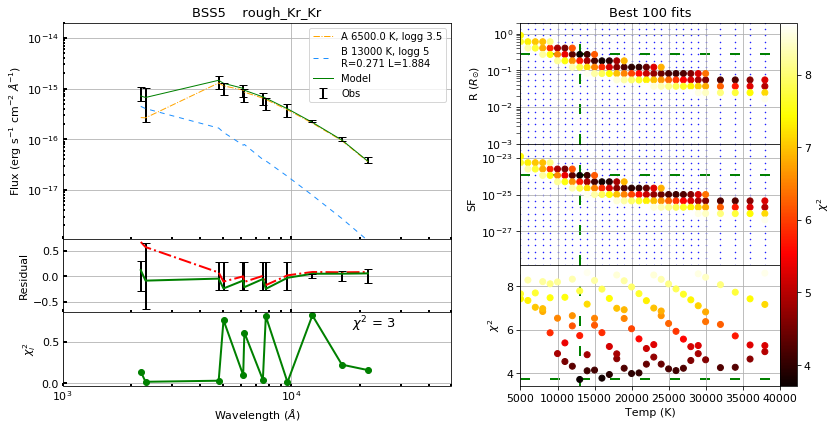

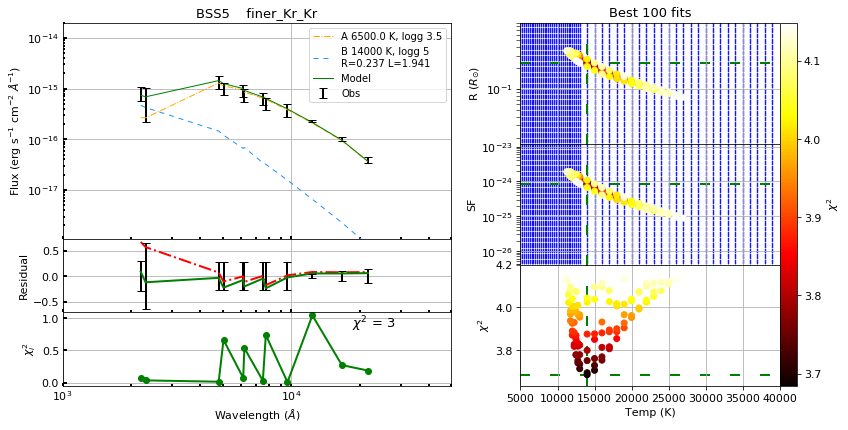

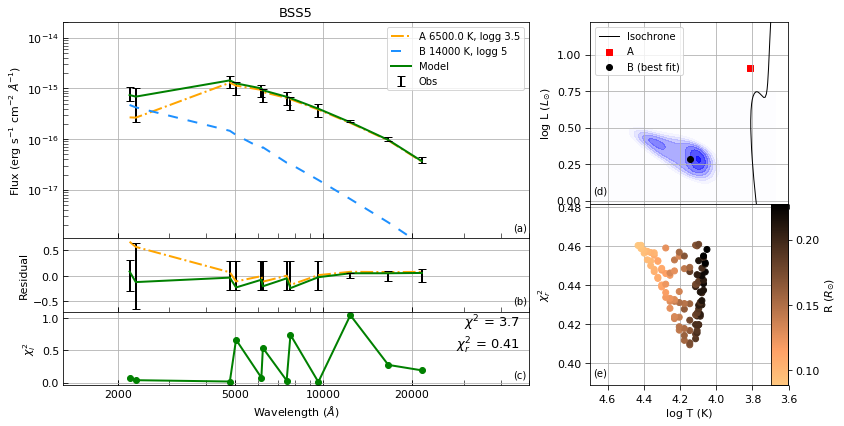

In [4]:
##############################################################
#---------------Reading fluxes and fitting SEDs--------------#
##############################################################
DIR_Main = 'C:/Users/Zert W/Desktop/PhD/Project22_King 2/'
DIR_OBS = 'C:/Users/Zert W/Desktop/PhD/Project22_King 2/VOSA_results/vosa_results_37162_5_BSS_3000_excess/objects/'
# DIR_OBS = 'C:/Users/Zert W/Desktop/PhD/Project22_King 2/VOSA_results/vosa_results_37162_5_BSS_4000_excess/objects/'
# DIR_OBS = 'C:/Users/Zert W/Desktop/PhD/Project22_King 2/VOSA_results/vosa_results_37162_5_BSS_5000_excess/objects/'

STAR_NUMBER, cycle, logg_B, MH_B, model,fitting_required, free_para = '5', 12, '5' , '05', 'Kr', 0, 2+1
# fitting_required:   Keep it as 1 if you are fitting for the first time and keep it as 0 if you already have a chi2 file and just want to plot SEDs/analyse the fits
# cycle:              You can use different cycle to try different things, In my experience, initial tries "cycle=1" are bad
                    # 5 = e_pan_g & e_pan_r = max+0.1
                    # 6 = e_pan_g & e_pan_r = mean
                    # 12 = errors = mean and  vosa_results_37162_5_BSS_3000_excess   ---> final
                    # 20 = errors = mean and  vosa_results_37162_5_BSS_5000_excess
                    # 21 = errors = actual and  vosa_results_37162_5_BSS_5000_excess
                    # 40 = errors = mean and  vosa_results_37162_5_BSS_4000_excess
                    # 41 = errors = actual and  vosa_results_37162_5_BSS_4000_excess
# free_para:        2+1   2 for A component (Kr_Temp and Kr_logg) and 1 for B component (Kr_Temp)
                    # One has to keep it same as the number of free parameters in 
# One can play with STAR_NAME and STAR_NUMBER
STAR_NAME = 'BSS'+str(STAR_NUMBER)
distance = 5800 # in pc
distance_err = 100

# Reading single component fitted data from VOSA
File_A = DIR_OBS + STAR_NAME +'/bestfitp/'+ STAR_NAME +'.bfit.phot.dat'
flux_A = pd.read_csv(File_A, engine='python', comment='#',delim_whitespace= True, skipinitialspace=True, header=None)

########## Reading the column names automatically #############
flux_A_col = pd.read_csv(File_A, engine='python',delim_whitespace= True,skipinitialspace=True,skiprows=39, nrows=1,escapechar='#', header=None)
flux_A_col=flux_A_col.drop([0], axis=1)
flux_A.columns = flux_A_col.values[0]
flux_A = flux_A.set_index('FilterID')
Teff_A = get_number_from_string(linecache.getline(File_A, 9))
logg_A = get_number_from_string(linecache.getline(File_A, 10))
Md_A = get_number_from_string(linecache.getline(File_A, 13))
L_A = get_number_from_string(linecache.getline(File_A, 37))
print('Cooler Component fit parameters: T, logg, Md', Teff_A,logg_A, Md_A)

# Some filters will have to be removed while fitting. e.g. in case of IR excess, you can remove Wise filters, or you want to specifically remove something, you can do it here.
# Removing R filter in BSS1,3,4  and W1/W2 in BSS4
if (STAR_NAME == 'BSS1'):
    flux_A=flux_A.drop(index='CAHA/CAHA.642_147')
elif (STAR_NAME=='BSS2'):
    pass
elif (STAR_NAME=='BSS3'):
    flux_A=flux_A.drop(index='CAHA/CAHA.642_147')
elif (STAR_NAME=='BSS4'):
    flux_A=flux_A.drop(index='CAHA/CAHA.642_147')
    flux_A=flux_A.drop(index='WISE/WISE.W1')
    flux_A=flux_A.drop(index='WISE/WISE.W2')    
elif (STAR_NAME=='BSS5'):
    flux_A=flux_A.drop(index='PAN-STARRS/PS1.z')        #Trial  
    pass

print flux_A.index           # Check if the filters are same as required
N_points = len(flux_A)
N_Np = N_points-free_para
# flux_A_col.values[0]     # The column names in the file are as follows: 
#         'Filter', 'Wave', 'ObsFlux', 'ObsErr', 'CorFlux','CorErr', 'ModFlux', 'Fitted', 'Excess', 'FitExc','UpLim'
#         We are interested in 
#                   CorFlux, CorErr (extinction corrected observed flux)
#                   ModFlux (Model Flux of the cooler component fitted by VOSA)
#         Residual will be 'CorFlux-ModFlux'
#         This residual will be fitted with a hotter component (Koester model in this code)

# loading the synthetic flux file
if model =='Koe':
    flux_model = pd.read_csv('CAHA models/Koester_WD_logg'+logg_B+'.csv', engine='python')
if model == 'Kr':
    flux_model = pd.read_csv('CAHA models/Kurucz_logg'+logg_B+'_Z'+MH_B+'.csv', engine='python')
if model == 'Tlusty':
    flux_model = pd.read_csv('CAHA models/Tlusty_logg'+logg_B+'.csv', engine='python')

flux_model = flux_model.sort_values('wave')
flux_model = flux_model.set_index('filter')

# combining observed and model fluxes for easier intercomparison
# Adding the observed corrected flux and errors to the combined file
flux_model['CorFlux']=flux_A['Flux']
flux_model['CorErr']=flux_A['Error']
flux_model['flux_A']=flux_A['FluxMod']

#Replacing zeros in errors with max error
flux_model['CorErr_frac']=flux_model['CorErr']/flux_model['CorFlux']
flux_model['CorErr'] = flux_model['CorErr'].replace(0, flux_model['CorFlux']*(flux_model['CorErr_frac'].max()+0.1)) 


if (cycle > 5):
    flux_model['CorErr']['CAHA/CAHA.366_52'] =flux_model['CorFlux']['CAHA/CAHA.366_52']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting  
    flux_model['CorErr']['CAHA/CAHA.448_75ab'] =flux_model['CorFlux']['CAHA/CAHA.448_75ab']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting
    flux_model['CorErr']['CAHA/CAHA.537_89'] =flux_model['CorFlux']['CAHA/CAHA.537_89']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting  
    flux_model['CorErr']['CAHA/CAHA.642_147'] =flux_model['CorFlux']['CAHA/CAHA.642_147']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting  

    flux_model['CorErr']['GAIA/GAIA2.G']   =flux_model['CorFlux']['GAIA/GAIA2.G']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting  
    flux_model['CorErr']['GAIA/GAIA2.Gbp'] =flux_model['CorFlux']['GAIA/GAIA2.Gbp']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting
    flux_model['CorErr']['GAIA/GAIA2.Grp'] =flux_model['CorFlux']['GAIA/GAIA2.Grp']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting  
    
    flux_model['CorErr']['PAN-STARRS/PS1.g'] =flux_model['CorFlux']['PAN-STARRS/PS1.g']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting  
    flux_model['CorErr']['PAN-STARRS/PS1.r'] =flux_model['CorFlux']['PAN-STARRS/PS1.r']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting
    flux_model['CorErr']['PAN-STARRS/PS1.i'] =flux_model['CorFlux']['PAN-STARRS/PS1.i']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting  
    flux_model['CorErr']['PAN-STARRS/PS1.z'] =flux_model['CorFlux']['PAN-STARRS/PS1.z']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting  
    flux_model['CorErr']['PAN-STARRS/PS1.y'] =flux_model['CorFlux']['PAN-STARRS/PS1.y']*(flux_model['CorErr_frac'].mean())  # Increasing error for lenient fitting
    flux_model['CorErr_frac']=flux_model['CorErr']/flux_model['CorFlux']

if cycle == 5:    
    flux_model['CorErr']['PAN-STARRS/PS1.g'] =flux_model['CorFlux']['PAN-STARRS/PS1.g']*(flux_model['CorErr_frac'].max()+0.1)  # Increasing error in Panstar_g for lenient fitting  
    flux_model['CorErr']['PAN-STARRS/PS1.r'] =flux_model['CorFlux']['PAN-STARRS/PS1.r']*(flux_model['CorErr_frac'].max()+0.1)  # Increasing error in Panstar_r for lenient fitting
    flux_model['CorErr_frac']=flux_model['CorErr']/flux_model['CorFlux']


# Removing rows without datapoints in filters
flux_model = flux_model[flux_model['CorFlux'].notna()]

print (list(flux_model.columns.values))

mode='rough_Kr_'+model


# I will first make a rough fit with large range in radii (SF) and rough temperature values
# After the first fit, you can reduce the Radius range and include all temperature values to get a better fit.

# WDs have a range in radius, our limits are as follows: e.g. R_earth = 0.009
R_min, R_max = 0.001, 2
# Calculating scaling factor range based in the radius range
sf_min, sf_max = (R_min/(distance*44353566.0))**2, (R_max/(distance*44353566.0))**2    
scale_list, temp_B_list = _initializing_sf_T(mode,sf_min, sf_max)
data_chi = _calculating_chi2(scale_list, temp_B_list,fitting_required , mode)
_minimizing_chi2()
_create_plots_1(mode)

mode='finer_Kr_'+model
# Now we will limit our fits to sf range. We will also use all the temperatures available
sf_min = data_chi['SF'].head(100).min()
sf_max = data_chi['SF'].head(100).max()

scale_list, temp_B_list = _initializing_sf_T(mode,sf_min, sf_max)
data_chi = _calculating_chi2(scale_list, temp_B_list,fitting_required, mode)
_minimizing_chi2()
_create_plots_1(mode)
_create_plots_2(mode)

# _save_log()

In [ ]:
mode='test_Kr_' + model
sf_min, sf_max = 2e-26,2e-24
scale_list, temp_B_list = _initializing_sf_T(mode,sf_min, sf_max)
data_chi = _calculating_chi2(scale_list, temp_B_list, 1, mode)
_minimizing_chi2()
winsound.Beep(700,700) #freqency Hz, Duration ms
_create_plots_1(mode)


In [50]:
mode='test_Kr_' + model
sf_min, sf_max = 2e-26,2e-24
scale_list, temp_B_list = _initializing_sf_T(mode,sf_min, sf_max)
data_chi = _calculating_chi2(scale_list, temp_B_list, 1, mode)
_minimizing_chi2()
winsound.Beep(700,700) #freqency Hz, Duration ms

flux_model_2 = pd.read_csv('CAHA models/Koester_WD_logg'+logg_B+'.csv', engine='python')
flux_model_2 = flux_model_2.sort_values('wave')
flux_model_2 = flux_model_2.set_index('filter')
flux_model_2 = flux_model
data_chi=data_chi.sort_values('SF')
data_chi=data_chi.reset_index(drop=True)
data_chi=data_chi.sort_values('Temp')
data_chi=data_chi.reset_index(drop=True)

L_SF,  L_T,  L_T*L_SF =   3 3 9
0
    Temp            SF     ChiSqr
0  22000  2.000000e-25   7.109933
1  30000  2.000000e-26  38.015617
2  22000  2.000000e-26  60.875980
3  10000  2.000000e-24  66.210621
4  10000  2.000000e-25  72.284392


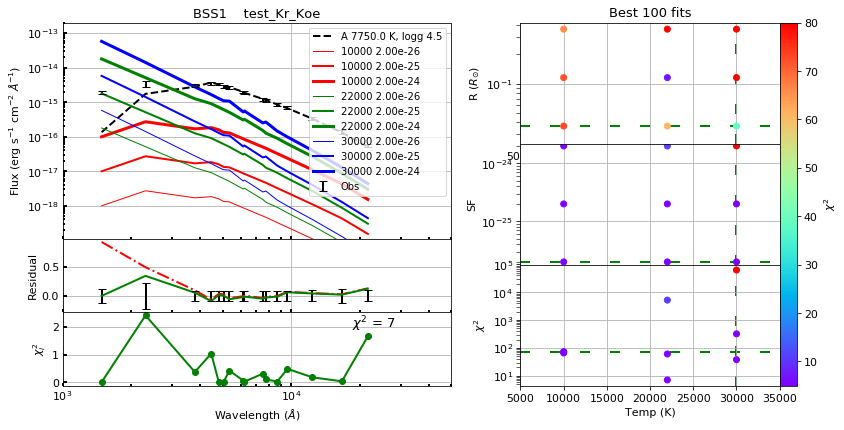

In [52]:
###################### initialising
label_A = 'A ' + str(Teff_A) + ' K, logg ' + str(logg_A)# + ' (Kurucz)'
label_B = 'B ' + str(Teff_B) + ' K, logg ' + str(logg_B)+'\nR='+str(round(data_chi.SF[0]**0.5 * (distance*44353566.0),3)) # + ' (Koester)'
f, axes = plt.subplots(figsize=(12,6),nrows = 3, ncols = 3,squeeze=True,sharex=True, sharey=True)
map(lambda axes: axes.set_axis_off(), axes.ravel())
axes[0][0] = f.add_axes([0.1, 0.44, 0.45, 0.50])
axes[1][0] = f.add_axes([0.1, 0.27, 0.45, 0.17])
axes[2][0] = f.add_axes([0.1, 0.10, 0.45, 0.17])

axes[0][1] = f.add_axes([0.63, 0.66, 0.30, 0.28])
axes[1][1] = f.add_axes([0.63, 0.38, 0.30, 0.28])
axes[2][1] = f.add_axes([0.63, 0.10, 0.30, 0.28])

axes[0][2] = f.add_axes([0.93, 0.10, 0.02, 0.84])
#######################
axes[0][0].plot(flux_model['wave'], flux_model['flux_A'], color='black', linestyle='--',label =label_A, lw=2)

Teff_B, sf_B =data_chi.Temp[0], data_chi.SF[0]
axes[0][0].plot(flux_model_2['wave'], sf_B * flux_model_2[str(Teff_B)], color='red', linestyle='-',label =str(Teff_B)+' '+str("{:.2e}".format(sf_B)), lw=1)
Teff_B, sf_B =data_chi.Temp[1], data_chi.SF[1]
axes[0][0].plot(flux_model_2['wave'], sf_B * flux_model_2[str(Teff_B)], color='red', linestyle='-',label =str(Teff_B)+' '+str("{:.2e}".format(sf_B)), lw=2)
Teff_B, sf_B =data_chi.Temp[2], data_chi.SF[2]
axes[0][0].plot(flux_model_2['wave'], sf_B * flux_model_2[str(Teff_B)], color='red', linestyle='-',label =str(Teff_B)+' '+str("{:.2e}".format(sf_B)), lw=3)
Teff_B, sf_B =data_chi.Temp[3], data_chi.SF[3]
axes[0][0].plot(flux_model_2['wave'], sf_B * flux_model_2[str(Teff_B)], color='green', linestyle='-',label =str(Teff_B)+' '+str("{:.2e}".format(sf_B)), lw=1)
Teff_B, sf_B =data_chi.Temp[4], data_chi.SF[4]
axes[0][0].plot(flux_model_2['wave'], sf_B * flux_model_2[str(Teff_B)], color='green', linestyle='-',label =str(Teff_B)+' '+str("{:.2e}".format(sf_B)), lw=2)
Teff_B, sf_B =data_chi.Temp[5], data_chi.SF[5]
axes[0][0].plot(flux_model_2['wave'], sf_B * flux_model_2[str(Teff_B)], color='green', linestyle='-',label =str(Teff_B)+' '+str("{:.2e}".format(sf_B)), lw=3)
Teff_B, sf_B =data_chi.Temp[6], data_chi.SF[6]
axes[0][0].plot(flux_model_2['wave'], sf_B * flux_model_2[str(Teff_B)], color='blue', linestyle='-',label =str(Teff_B)+' '+str("{:.2e}".format(sf_B)), lw=1)
Teff_B, sf_B =data_chi.Temp[7], data_chi.SF[7]
axes[0][0].plot(flux_model_2['wave'], sf_B * flux_model_2[str(Teff_B)], color='blue', linestyle='-',label =str(Teff_B)+' '+str("{:.2e}".format(sf_B)), lw=2)
Teff_B, sf_B =data_chi.Temp[8], data_chi.SF[8]
axes[0][0].plot(flux_model_2['wave'], sf_B * flux_model_2[str(Teff_B)], color='blue', linestyle='-',label =str(Teff_B)+' '+str("{:.2e}".format(sf_B)), lw=3)

# axes[0][0].plot(flux_model['wave'], flux_model['Total'], color='green', linestyle='-',label ='Model', lw=1)

matplotlib.rcParams.update({'errorbar.capsize': 4})
axes[0][0].errorbar(flux_model['wave'], flux_model['CorFlux'], yerr=flux_model['CorErr'],color='k', label='Obs',fmt='none',lw=2)


axes[1][0].plot(flux_model['wave'], (flux_model['CorFlux']-flux_model['flux_A'])/flux_model['CorFlux'],label='',marker='',color='red', linestyle='-.',lw=2)
axes[1][0].plot(flux_model['wave'], (flux_model['CorFlux']-flux_model['flux_A']-flux_model['flux_B'])/flux_model['CorFlux'],label='',marker='',color='green',lw=2, linestyle='-')
axes[1][0].errorbar(flux_model['wave'], flux_model['CorFlux']-flux_model['CorFlux'], yerr=flux_model['CorErr_frac'],color='k', label='Obs',fmt='none',lw=2)

axes[2][0].plot(flux_model['wave'], flux_model['chisqu'],label='',marker='o',color='green', linestyle='-',lw=2)
#############
x_data = data_chi.Temp.astype(np.int).head(100)
y_data = _radius(data_chi['SF'].head(100))
c_data = data_chi['ChiSqr'].head(100)
axes[0][1].scatter(data_chi.Temp.astype(np.int),_radius(data_chi['SF']), marker='.', c='b', s=1,rasterized = True, zorder=0)#,c=c_data, cmap='hot', s=1, marker='.')
cs = axes[0][1].scatter(x_data,y_data,c=c_data, cmap='rainbow',rasterized = True, zorder=2)

y_data = data_chi['SF'].head(100)
axes[1][1].scatter(data_chi.Temp.astype(np.int),data_chi['SF'],marker='.', c='b', s=1,rasterized = True,zorder=0)
axes[1][1].scatter(x_data,y_data,c=c_data, cmap='rainbow',rasterized = True,zorder=2)

y_data = data_chi['ChiSqr'].head(100)
axes[2][1].scatter(x_data,y_data,c=c_data, cmap='rainbow',rasterized = True,zorder=2)  
#############
f.colorbar(cs, cax=axes[0][2])
cs.set_clim(5,80)
axes[0][2].set_ylabel('$\chi^2$')
axes[0][2].yaxis.set_label_position("right")
#############
axes[0][1].axvline(int(Teff_B), ls=(0, (5, 10)), lw=2, c='g',zorder=1)
axes[1][1].axvline(int(Teff_B), ls=(0, (5, 10)), lw=2, c='g',zorder=1)
axes[2][1].axvline(int(Teff_B), ls=(0, (5, 10)), lw=2, c='g',zorder=1)

axes[0][1].axhline(_radius(data_chi.SF[0]), ls=(0, (5, 10)), lw=2, c='g',zorder=1)
axes[1][1].axhline(data_chi.SF[0], ls=(0, (5, 10)), lw=2, c='g',zorder=1)
axes[2][1].axhline(data_chi.ChiSqr[0], ls=(0, (5, 10)), lw=2, c='g',zorder=1)
#######################
axes[0][0].set_title(STAR_NAME+'    ' +mode)
axes[0][1].set_title('Best 100 fits')
axes[2][0].set_title('$\chi^2$ = '+str(int(flux_model['chisqu'].sum())),x=0.8,y=0.7)
axes[0][0].set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ $\AA$$^{-1}$)')
axes[1][0].set_ylabel('Residual')
axes[2][0].set_ylabel('$\chi^2_i$')
axes[2][0].set_xlabel('Wavelength ($\AA$)')
axes[0][1].set_ylabel('R ($R_{\odot}$)')
axes[1][1].set_ylabel('SF')
axes[2][1].set_ylabel('$\chi^2$')
axes[2][1].set_xlabel('Temp (K)')

axes[0][0].set_xscale('log')
axes[0][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[2][0].set_xscale('log')
axes[0][1].set_yscale('log')
axes[1][1].set_yscale('log')
axes[2][1].set_yscale('log')

plt.setp(axes[0][0].get_xticklabels(),visible=False)
plt.setp(axes[1][0].get_xticklabels(),visible=False)
plt.setp(axes[1][0].get_xticklabels(),visible=False)
plt.setp(axes[1][1].get_xticklabels(),visible=False)

axes[0][0].tick_params(which='both', direction='in', width=2)
axes[1][0].tick_params(which='both', direction='in', width=2)
axes[2][0].tick_params(which='both', direction='in', width=2)
axes[0][1].tick_params(which='both', direction='out', length=4)
axes[1][1].tick_params(which='both', direction='out', length=4)
axes[2][1].tick_params(which='both', direction='out', length=4)

axes[0][1].grid()
axes[1][1].grid()
axes[2][1].grid()
axes[0][0].grid()
axes[1][0].grid()
axes[2][0].grid()

axes[0][0].set_xlim([1000,50000])
axes[1][0].set_xlim([1000,50000])
axes[2][0].set_xlim([1000,50000])
if ((mode=='test_Kr_Koe')):    
    axes[0][1].set_xlim([5000,35000])
    axes[1][1].set_xlim([5000,35000])
    axes[2][1].set_xlim([5000,35000])

axes[0][0].set_ylim([1.1e-19,2e-13])
# axes[0][1].set_ylim(_radius(sf_min),_radius(sf_max))
axes[1][1].set_ylim(0.9*sf_min,1.1*sf_max)

#############
axes[0][0].legend(scatterpoints=1, loc='upper right')
# plt.savefig(DIR_Main + 'SED_data/Example_'+STAR_NAME+'_'+str(Teff_B)+'_logg'+str(logg_B)+'_'+MH_B+'_'+model+'_'+str(cycle)+'.png', format='png', dpi=300)#,bbox_inches='tight')
